In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
drug_data="data/mouse_drug_data.csv"
trial_data="data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
drug_data_df=pd.read_csv(drug_data)
trial_data_df=pd.read_csv(trial_data)

# Combine the data into a single dataset
combined_mouse_df=pd.merge(trial_data_df, drug_data_df,
                          how='left', on='Mouse ID')

# Display the data table for preview
combined_mouse_df.head(100)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril
...,...,...,...,...,...
95,k862,0,45.0,0,Stelasyn
96,g867,0,45.0,0,Stelasyn
97,s619,0,45.0,0,Stelasyn
98,w697,0,45.0,0,Stelasyn


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
mean=combined_mouse_df[["Drug", "Timepoint", "Tumor Volume (mm3)"]]
group_mean_volume=mean.groupby(["Drug", "Timepoint"])

# Convert to DataFrame
mean_summary=pd.DataFrame(group_mean_volume.mean().reset_index())

# Preview DataFrame
mean_summary.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
stderror=combined_mouse_df[["Drug", "Timepoint", "Tumor Volume (mm3)"]]
group_stderror=stderror.groupby(["Drug", "Timepoint"])

# Convert to DataFrame
stderror_summary=pd.DataFrame(group_stderror.sem().reset_index())

# Preview DataFrame
stderror_summary.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [4]:
# Minor Data Munging to Re-Format the Data Frames
summary=mean_summary.pivot(index='Timepoint', columns='Drug')
summary.columns=summary.columns.droplevel(0)

# Preview that Reformatting worked
summary

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [5]:
summary_error=stderror_summary.pivot(index='Timepoint', columns= "Drug")
summary_error.columns=summary_error.columns.droplevel(0)
summary_error

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182
25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.577401,0.746991,0.741922,0.602513
30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.746045,0.864906,0.899548,0.800043
35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.084929,0.967433,1.003186,0.881426
40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515


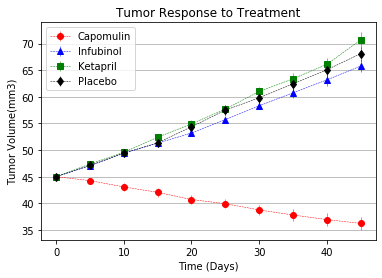

<Figure size 432x288 with 0 Axes>

In [6]:
# Generate the Plot (with Error Bars)
fig,ax=plt.subplots()

#Set x_axis
x_axis=summary.index

#Get error bar for each Drug 
plt.errorbar(x_axis,summary["Capomulin"], yerr=summary_error["Capomulin"], 
             color="r",marker="o", linewidth=0.5, linestyle='--', label="Capomulin")

plt.errorbar(x_axis, summary["Infubinol"], yerr=summary_error["Infubinol"],
            color="b", marker="^", linewidth=0.5, linestyle="--", label= "Infubinol")

plt.errorbar(x_axis, summary["Ketapril"], yerr=summary_error["Ketapril"],
            color="g", marker="s", linewidth=0.5, linestyle="--", label= "Ketapril")

plt.errorbar(x_axis, summary["Placebo"], yerr=summary_error["Placebo"],
            color="black", marker="d", linewidth=0.5, linestyle="--", label= "Placebo")

#Set title, x/y labels, legend; Add gridlines
ax.set_title("Tumor Response to Treatment")
ax.set_xlabel("Time (Days)")
ax.set_ylabel("Tumor Volume(mm3)")
ax.legend(loc="upper left")
ax.grid(axis='y')

# Show the Figure
plt.show()

# Save the Figure
plt.savefig("../plots/Tumor_Response_Treatment.png")

## Metastatic Response to Treatment

In [7]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
mean_meta=combined_mouse_df[["Drug", "Timepoint", "Metastatic Sites"]]
group_mean_meta=mean_meta.groupby(["Drug", "Timepoint"])

# Convert to DataFrame
mean_meta_summary=pd.DataFrame(group_mean_meta.mean().reset_index())

# Preview DataFrame
mean_meta_summary.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [8]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
stderror_meta=combined_mouse_df[["Drug", "Timepoint", "Metastatic Sites"]]
group_stderror_meta=stderror_meta.groupby(["Drug", "Timepoint"])

# Convert to DataFrame
stderror_meta_summary=pd.DataFrame(group_stderror_meta.sem().reset_index())

# Preview DataFrame
stderror_meta_summary.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [9]:
summary_meta_error=stderror_meta_summary.pivot(index='Timepoint', columns= "Drug")
summary_meta_error.columns=summary_meta_error.columns.droplevel(0)
summary_meta_error

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378
25,0.181818,0.258831,0.265753,0.288275,0.185240,0.263888,0.199095,0.119430,0.219824,0.236621
30,0.172944,0.249479,0.227823,0.347467,0.266667,0.300264,0.266469,0.139968,0.230641,0.248168
35,0.169496,0.266526,0.224733,0.361418,0.330464,0.341412,0.366667,0.145997,0.240983,0.285714
40,0.175610,0.289128,0.314466,0.315725,0.321702,0.297294,0.433903,0.160591,0.312815,0.299791


In [10]:
# Minor Data Munging to Re-Format the Data Frames
summary_meta=mean_meta_summary.pivot(index='Timepoint', columns='Drug')
summary_meta.columns=summary_meta.columns.droplevel(0)

# Preview that Reformatting worked
summary_meta.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


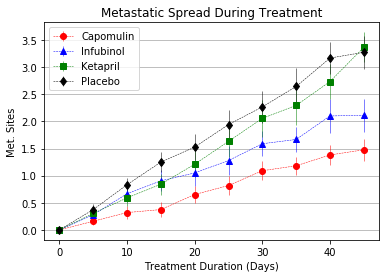

In [11]:
# Generate the Plot (with Error Bars)
fig,ax=plt.subplots()

#Set x_axis
x_axis=summary_meta.index

#Get error bar for each Drug 
plt.errorbar(x_axis,summary_meta["Capomulin"], yerr=summary_meta_error["Capomulin"], 
             color="r",marker="o", linewidth=0.5, linestyle='--', label="Capomulin")

plt.errorbar(x_axis,summary_meta["Infubinol"], yerr=summary_meta_error["Infubinol"],
            color="b", marker="^", linewidth=0.5, linestyle="--", label= "Infubinol")

plt.errorbar(x_axis,summary_meta["Ketapril"], yerr=summary_meta_error["Ketapril"],
            color="g", marker="s", linewidth=0.5, linestyle="--", label= "Ketapril")

plt.errorbar(x_axis,summary_meta["Placebo"], yerr=summary_meta_error["Placebo"],
            color="black", marker="d", linewidth=0.5, linestyle="--", label= "Placebo")

#Set title, x/y labels, legend; Add gridlines
ax.set_title("Metastatic Spread During Treatment")
ax.set_xlabel("Treatment Duration (Days)")
ax.set_ylabel("Met. Sites")
ax.legend(loc="upper left")
ax.grid(axis='y')

# Save the Figure
plt.savefig("../plots/Metastatic_Response_Treatment.png")

# Show the Figure
plt.show()

## Survival Rates

In [12]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mice_count=combined_mouse_df[["Drug", "Timepoint", "Mouse ID"]]
group_mice_count=mice_count.groupby(["Drug", "Timepoint"])

# Convert to DataFrame
mice_summary=pd.DataFrame(group_mice_count.count().reset_index())

mice_summary=mice_summary.rename(columns={"Mouse ID": "Mouse Count"})

# Preview DataFrame
mice_summary.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [13]:
# Minor Data Munging to Re-Format the Data Frames
summary_count=mice_summary.pivot(index='Timepoint', columns='Drug')
summary_count.columns=summary_count.columns.droplevel(0)

# Preview the Data Frame
summary_count.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


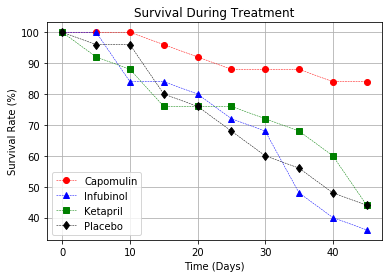

In [14]:
#Generate the Plot (with Error Bars)
fig,ax=plt.subplots()

#Set x_axis
x_axis=summary_count.index

#Get error bar for each Drug 
plt.errorbar(x_axis,summary_count["Capomulin"]/25*100, color="r",marker="o", linewidth=0.5, linestyle='--', label="Capomulin")

plt.errorbar(x_axis,summary_count["Infubinol"]/25*100, color="b", marker="^", linewidth=0.5, linestyle="--", label= "Infubinol")

plt.errorbar(x_axis,summary_count["Ketapril"]/25*100, color="g", marker="s", linewidth=0.5, linestyle="--", label= "Ketapril")

plt.errorbar(x_axis,summary_count["Placebo"]/25*100, color="black", marker="d", linewidth=0.5, linestyle="--", label= "Placebo")

#Set title, x/y labels, legend; Add gridlines
ax.set_title("Survival During Treatment")
ax.set_xlabel("Time (Days)")
ax.set_ylabel("Survival Rate (%)")
ax.legend(loc="bottom left")
ax.grid(axis='y')
ax.grid(axis='x')

# Save the Figure
plt.savefig("../plots/Survival_Rate.png")

# Show the Figure
plt.show()

## Summary Bar Graph

In [15]:
#Calculate percent changes for each drug 
drug_change=((summary.iloc[-1]-summary.iloc[0])/summary.iloc[0])*100

#Display the data to confirm
drug_change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

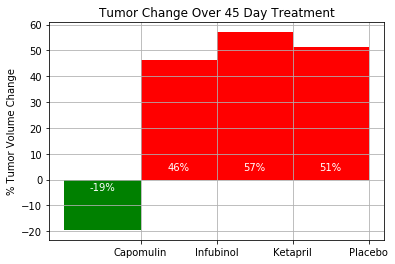

In [16]:
# Store all Relevant Percent Changes into a Tuple
pct_change=(drug_change["Capomulin"], drug_change["Infubinol"], drug_change["Ketapril"], drug_change["Placebo"])

# Splice the data between passing and failing drugs
fig,ax=plt.subplots()

x=np.arange(len(pct_change))

width=1

pass_drugs= ax.bar(x[0],pct_change[0], width, color="g")
fail_drugs=ax.bar(x[1:],pct_change[1:], width, color="r")

# Orient widths. Add labels, tick marks, etc. 
ax.set_title("Tumor Change Over 45 Day Treatment")
ax.set_ylabel("% Tumor Volume Change")

ax.grid(axis='y')
ax.grid(axis='x')

ax.set_xticks(x+0.5)

ax.set_xticklabels(("Capomulin", "Infubinol", "Ketapril", "Placebo"))


# Use functions to label the percentages of changes
def pct_fail(x):
    for i in x:
        height = i.get_height()
        ax.text(i.get_x() + i.get_width()/2., 3,
                "%d%%" % int(height),
                ha= "center", va="bottom", color="w")
def pct_pass(x):
    for i in x:
        height = i.get_height()
        ax.text(i.get_x() + i.get_width()/2., -5,
                "%d%%" % int(height),
                ha= "center", va="bottom", color="w")
        
# Call functions to implement the function calls
pct_pass(pass_drugs)
pct_fail(fail_drugs)

# Save the Figure
plt.savefig("../plots/Summary_Graph.png")

# Show the Figure
fig.show()